<a href="https://colab.research.google.com/github/vikasyankanchi/0000/blob/main/MINI_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.35GB/s]
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,420,295 (5.42 MB)

 Trainable params: 1,420,295 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 328s 725ms/step - accuracy: 0.2524 - loss: 1.8091 - val_accuracy: 0.3884 - val_loss: 1.5823
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 386s 735ms/step - accuracy: 0.3714 - loss: 1.5984 - val_accuracy: 0.4635 - val_loss: 1.3967
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 383s 739ms/step - accuracy: 0.4506 - loss: 1.4381 - val_accuracy: 0.5036 - val_loss: 1.3054
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 322s 717ms/step - accuracy: 0.4818 - loss: 1.3653 - val_accuracy: 0.5152 - val_loss: 1.2535
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 322s 716ms/step - accuracy: 0.4983 - loss: 1.3164 - val_accuracy: 0.5325 - val_loss: 1.2145
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 322s 717ms/step - accuracy: 0.5143 - loss: 1.2768 - val_accuracy: 0.5440 - val_loss: 1.1958
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 323s 720ms/step - accuracy: 0.5319 - loss: 1.2352 - val_accuracy: 0.5442 - val_loss: 1.1787
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 321s 716ms/step - accuracy: 0.5347 -

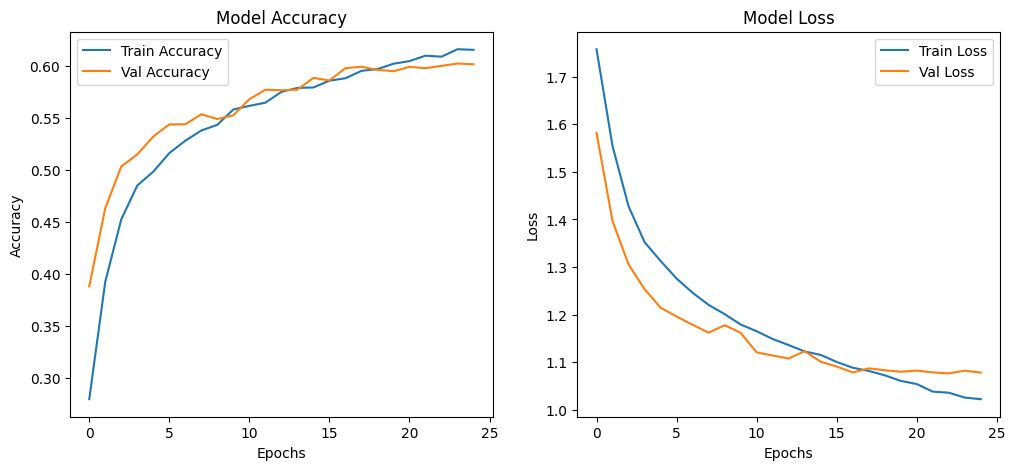

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


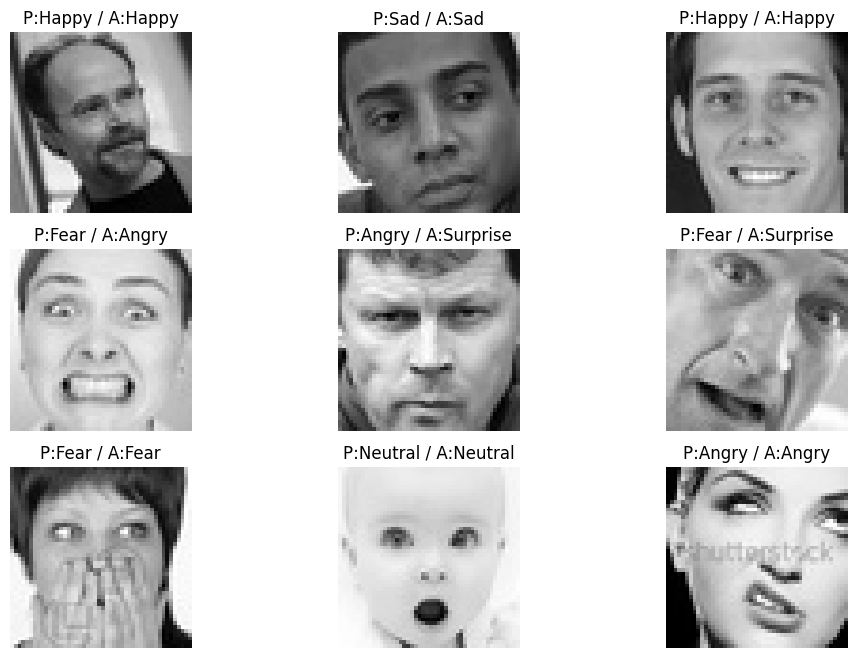

113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 206ms/step


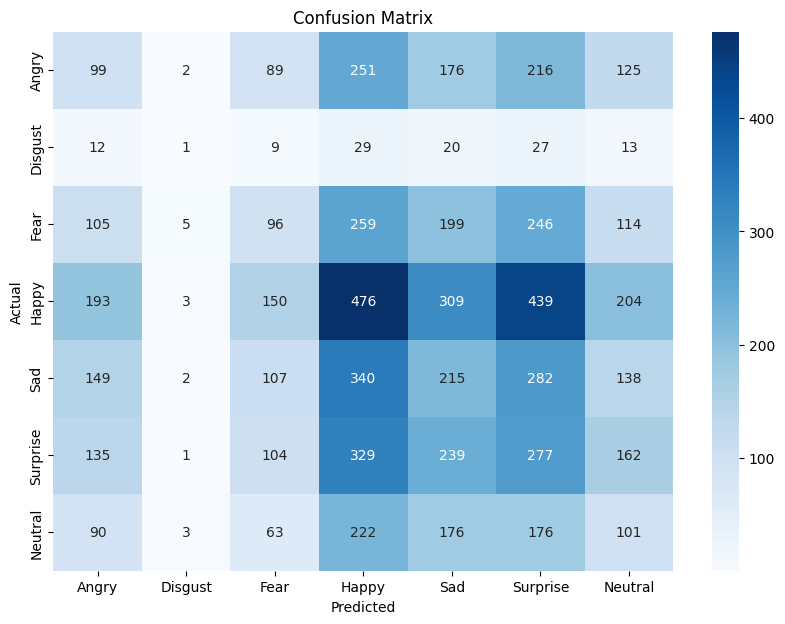


Classification Report:

              precision    recall  f1-score   support

       Angry       0.13      0.10      0.11       958
     Disgust       0.06      0.01      0.02       111
        Fear       0.16      0.09      0.12      1024
       Happy       0.25      0.27      0.26      1774
         Sad       0.16      0.17      0.17      1233
    Surprise       0.17      0.22      0.19      1247
     Neutral       0.12      0.12      0.12       831

    accuracy                           0.18      7178
   macro avg       0.15      0.14      0.14      7178
weighted avg       0.17      0.18      0.17      7178



In [ ]:
# ================================
# 🎭 Emotion Detection using CNN
# ================================

# 1️⃣ Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 2️⃣ Download Dataset (Kaggle)
!pip install kaggle --quiet
!mkdir ~/.kaggle
!echo '{"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_API_KEY"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d msambare/fer2013
!unzip -qq fer2013.zip -d data

# 3️⃣ Data Preprocessing
train_dir = '/content/data/train'
test_dir = '/content/data/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

# 4️⃣ Build CNN Model
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 5️⃣ Train the Model
history = model.fit(train_data, validation_data=test_data, epochs=25)

# 6️⃣ Plot Accuracy & Loss Graphs
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 7️⃣ Sample Predictions
labels = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

x, y = next(test_data)
preds = model.predict(x)
plt.figure(figsize=(12,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x[i].reshape(48,48), cmap='gray')
    pred_label = labels[np.argmax(preds[i])]
    true_label = labels[np.argmax(y[i])]
    plt.title(f"P:{pred_label} / A:{true_label}")
    plt.axis('off')
plt.show()

# 8️⃣ Confusion Matrix
y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data), axis=-1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))
